<a href="https://colab.research.google.com/github/EliyaKaheni/ML-playground/blob/main/HomeWork01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


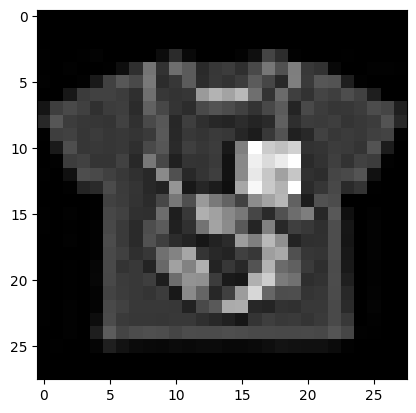

In [ ]:
plt.imshow(x_train[np.random.randint(60000)], cmap='gray')

# Data Preprocessing

مقادیر دیتا را برای آموزش شبکه عصبی آماده کنید
 راهنمایی: عکس ها را به شکل آرایه دربیاورید و همجنین مقادیر آن ها را اسکیل کنید

In [ ]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

مقدار های خروجی را بصورت 

one hot encoding تبدیل کنید

In [ ]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


In [ ]:
y_test[1:10]

,0,1,2,3,4,5,6,7,8,9
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0


# Model

یک مدل بر پایه شبکه عصبی طراحی کنید که دسته بندی را انجام دهد


هدف از تمرین حداقل درصد 80 میباشد


تعداد لایه ها و نوع آن ها به علاوه تعداد ایپاک ها و بچ سایز به انتخاب شماست و دلیل بیاورید که چرا این اندازه ها را انتخاب کرده اید

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(28 * 28, activation = "relu"))
model.add(Dense(14 * 14, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.build((None, 28*28))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 784)               615440    
                                                                 
 dense_4 (Dense)             (None, 196)               153860    
                                                                 
 dense_5 (Dense)             (None, 256)               50432     
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 822,302
Trainable params: 822,302
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = 1024, epochs=100, validation_data = (x_test, y_test))

Epoch 1/100
59/59 [==============================] - 2s 9ms/step - loss: 15.4384 - accuracy: 0.6629 - val_loss: 1.5313 - val_accuracy: 0.7739
Epoch 2/100
59/59 [==============================] - 0s 6ms/step - loss: 1.1375 - accuracy: 0.7984 - val_loss: 1.1124 - val_accuracy: 0.7927
Epoch 3/100
59/59 [==============================] - 0s 6ms/step - loss: 0.8653 - accuracy: 0.8162 - val_loss: 0.8947 - val_accuracy: 0.8009
Epoch 4/100
59/59 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.8345 - val_loss: 0.6918 - val_accuracy: 0.8317
Epoch 5/100
59/59 [==============================] - 0s 6ms/step - loss: 0.5512 - accuracy: 0.8473 - val_loss: 0.6739 - val_accuracy: 0.8262
Epoch 6/100
59/59 [==============================] - 0s 6ms/step - loss: 0.4908 - accuracy: 0.8562 - val_loss: 0.5827 - val_accuracy: 0.8369
Epoch 7/100
59/59 [==============================] - 0s 5ms/step - loss: 0.4071 - accuracy: 0.8698 - val_loss: 0.5472 - val_accuracy: 0.8456
Epoch 8/100
